## Hyperparameter tuning on SVC and Decision Tree performed on Voting Dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
#Tuning the parameters which we are using in our model instantiation process.
#These are the parameters which are used before fitting and transforming the data to the model

In [12]:
import pandas as pd
vote=pd.read_csv('votingdataset.csv',index_col=0)
vote.head()

,aid,budget,crime,duty_free_exports,eaa_rsa,education,immigration,infants,missile,party,physician,religious,salvador,satellite,superfund,synfuels,water
0,0,0,1,0,1,1,1,0,0,republican,1,1,1,0,1,0,1
1,0,0,1,0,1,1,0,0,0,republican,1,1,1,0,1,0,1
2,0,1,1,0,0,0,0,0,0,democrat,0,1,1,0,1,1,1
3,0,1,0,0,1,0,0,0,0,democrat,0,1,1,0,1,1,1
4,0,1,1,1,1,0,0,1,0,democrat,0,1,1,0,1,1,1


In [13]:
#Extract Features
X=vote.drop('party',axis=1)
y=vote['party']

In [14]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y1,stratify=y,random_state=21)

## Hyperparameter using SVC

In [15]:
from sklearn.svm import SVC
svc=SVC()
from sklearn.model_selection import GridSearchCV
params_dict={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'degree':[1,2,3,4,5],'gamma':['scale', 'auto']}
gscv=GridSearchCV(svc,params_dict,cv=8)
gscv.fit(X_train,y_train)
gscv.best_params_

{'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}

In [17]:
#Using above suggested parameters
from sklearn.svm import SVC
svm=SVC(degree=1, gamma='scale',kernel='linear')
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
svm.score(X_test,y_test)

0.963302752293578

In [19]:
y_pred=svm.predict(X_test)

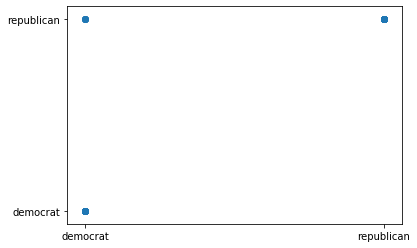

In [20]:
plt.scatter(y_test,y_pred)
plt.show()

## Hyperparameter using Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [22]:
#Using GridSearchCV
from sklearn.model_selection import GridSearchCV
params_dict={'criterion':["gini", "entropy"],'splitter':["best", "random"],'max_depth':[1,2,3,4],'min_samples_split':[1,2,3],'min_samples_leaf':[1,2],'max_features':["auto", "sqrt", "log2"]}
scv=GridSearchCV(tree,params_dict,cv=4)
scv.fit(X_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [23]:
scv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'random'}

In [24]:
#Using DecisionTreeClassifier and fitting the data with above suggested parameters
tree=DecisionTreeClassifier(criterion= 'gini',max_depth= 3,max_features='sqrt',min_samples_leaf= 1,min_samples_split= 2,
splitter= 'random')
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [25]:
tree.score(X_test,y_test)

0.8623853211009175

In [26]:
y_pred=tree.predict(X_test)

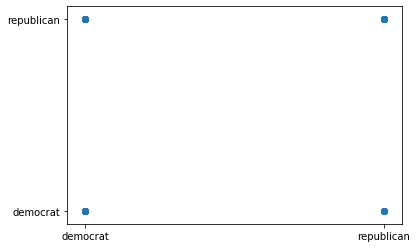

In [27]:
plt.scatter(y_test,y_pred)
plt.show()